In [1]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

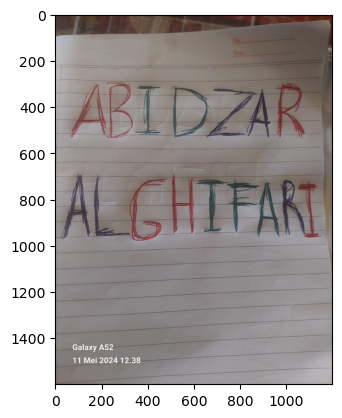

In [2]:
# Mengimpor gambar
color_picture = img.imread('myname.jpg')
# Menampilkan gambar
plt.imshow(color_picture)

(-0.5, 1199.5, 1599.5, -0.5)

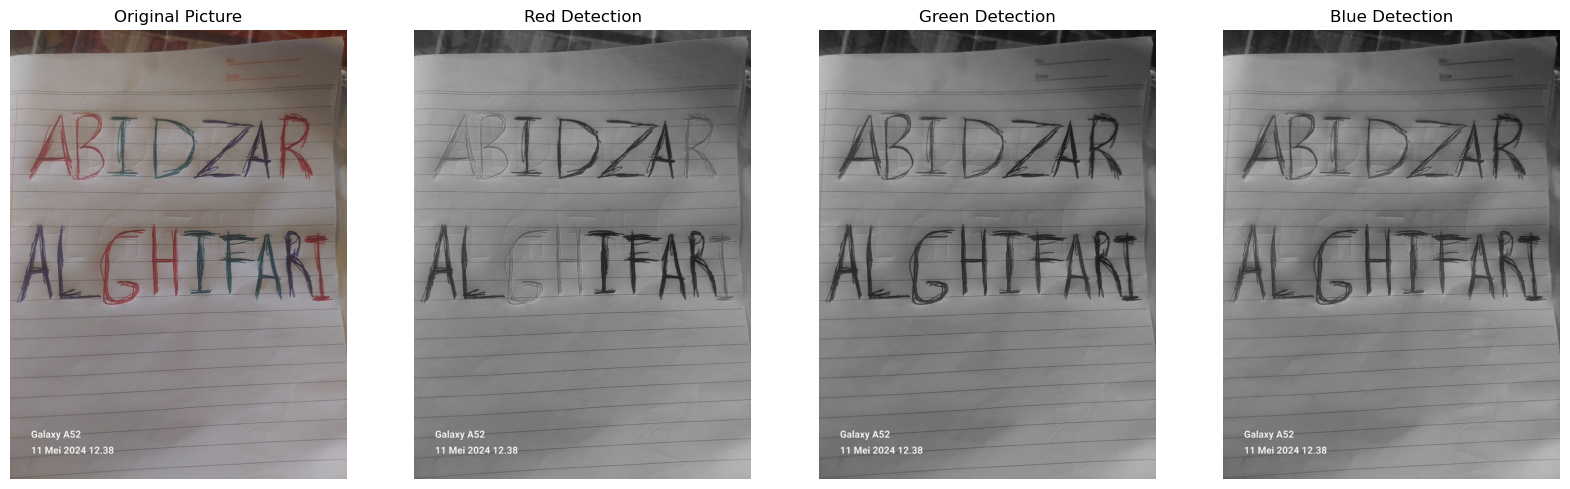

In [13]:
# Memisahkan saluran warna (Red, Green, Blue) dari gambar menggunakan slicing array
red = color_picture[:, :, 0]  # Saluran warna merah
green = color_picture[:, :, 1]  # Saluran warna hijau
blue = color_picture[:, :, 2]  # Saluran warna biru

# Membuat subplot dengan 1 baris dan 4 kolom, dengan ukuran figur 20x10
f, (c1, c2, c3, c4) = plt.subplots(1, 4, figsize=(20, 10))

# Menampilkan gambar asli di subplot pertama
c1.set_title('Original Picture')
c1.imshow(color_picture)
c1.axis('off')

# Menampilkan deteksi warna merah di subplot kedua
c2.set_title('Red Detection')
c2.imshow(red, cmap="gray")
c2.axis('off')

# Menampilkan deteksi warna hijau di subplot ketiga
c3.set_title('Green Detection')
c3.imshow(green, cmap="gray")
c3.axis('off')

# Menampilkan deteksi warna biru di subplot keempat
c4.set_title('Blue Detection')
c4.imshow(blue, cmap="gray")
c4.axis('off')

In [4]:
# Membaca gambar "myname.jpg" menggunakan OpenCV
color_picture = cv2.imread('myname.jpg')

In [5]:
# Mengonversi format warna dari BGR (OpenCV) ke RGB (Matplotlib)
color_picture = cv2.cvtColor(color_picture, cv2.COLOR_BGR2RGB)

In [6]:
# Menghitung histogram untuk saluran warna biru
histogram_blue = cv2.calcHist([b], [0], None, [256], [0, 256])

# Menghitung histogram untuk saluran warna hijau
histogram_green = cv2.calcHist([g], [0], None, [256], [0, 256])

# Menghitung histogram untuk saluran warna merah
histogram_red = cv2.calcHist([r], [0], None, [256], [0, 256])

# Menghitung histogram untuk keseluruhan warna dalam gambar
histogram_colors = cv2.calcHist([color_picture], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

(0.0, 256.0)

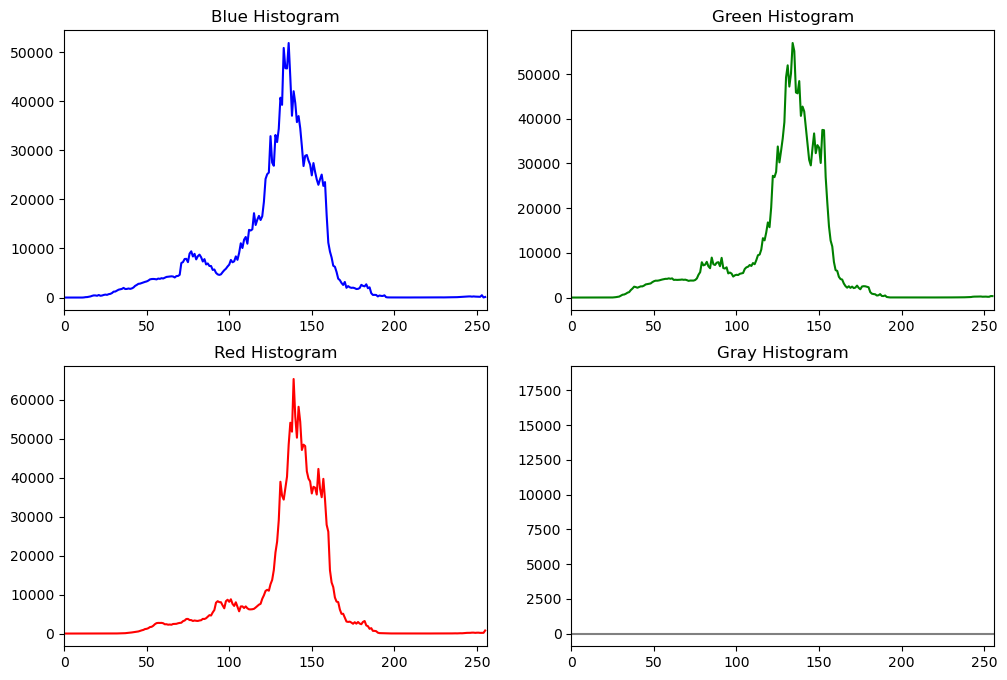

In [7]:
plt.figure(figsize=(12, 8))

# Menampilkan histogram saluran warna biru
plt.subplot(2, 2, 1)
plt.plot(histogram_blue, color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

# Menampilkan histogram saluran warna hijau
plt.subplot(2, 2, 2)
plt.plot(histogram_green, color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Menampilkan histogram saluran warna merah
plt.subplot(2, 2, 3)
plt.plot(histogram_red, color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Menampilkan histogram untuk seluruh warna
plt.subplot(2, 2, 4)
plt.plot(histogram_colors.flatten(), color='gray')
plt.title('Gray Histogram')
plt.xlim([0, 256])

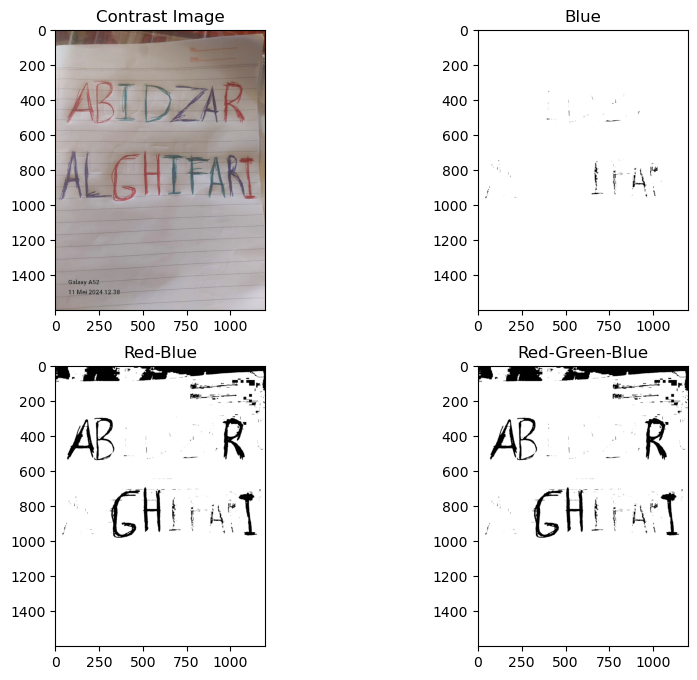

In [8]:
# Fungsi untuk meningkatkan kecerahan gambar
def increase_brightness(image, value=30):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += value
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

# Fungsi untuk mendeteksi dan menyorot warna biru dalam gambar
def detect_and_highlight_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_blue = np.array([100, 50, 50])
    up_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, low_blue, up_blue)
    
    result = cv2.bitwise_and(image, image, mask=blue_mask)
    result[np.where((result == [0,0,0]).all(axis=2))] = [255,255,255]  
    result[np.where((result != [255,255,255]).all(axis=2))] = [0,0,0]  
    return result

# Fungsi untuk mendeteksi dan menyorot kombinasi warna merah-biru dalam gambar
def detect_and_highlight_red_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_red1 = np.array([0, 50, 50])
    up_red1 = np.array([10, 255, 255])
    red_mask1 = cv2.inRange(hsv, low_red1, up_red1)
    low_red2 = np.array([170, 50, 50])
    up_red2 = np.array([180, 255, 255])
    red_mask2 = cv2.inRange(hsv, low_red2, up_red2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    
    low_blue = np.array([100, 50, 50])
    up_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, low_blue, up_blue)
    
    combined_mask = cv2.bitwise_or(red_mask, blue_mask)
    result = cv2.bitwise_and(image, image, mask=combined_mask)
    result[np.where((result == [0,0,0]).all(axis=2))] = [255,255,255]
    result[np.where((result != [255,255,255]).all(axis=2))] = [0,0,0] 
    return result

# Fungsi untuk mendeteksi dan menyorot kombinasi warna merah-hijau-biru dalam gambar
def detect_and_highlight_red_green_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_red1 = np.array([0, 50, 50])
    up_red1 = np.array([10, 255, 255])
    red_mask1 = cv2.inRange(hsv, low_red1, up_red1)
    low_red2 = np.array([170, 50, 50])
    up_red2 = np.array([180, 255, 255])
    red_mask2 = cv2.inRange(hsv, low_red2, up_red2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    
    low_green = np.array([40, 50, 50])
    up_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, low_green, up_green)
    
    low_blue = np.array([100, 50, 50])
    up_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, low_blue, up_blue)
    
    combined_mask = cv2.bitwise_or(red_mask, cv2.bitwise_or(green_mask, blue_mask))
    result = cv2.bitwise_and(image, image, mask=combined_mask)
    result[np.where((result == [0,0,0]).all(axis=2))] = [255,255,255]
    result[np.where((result != [255,255,255]).all(axis=2))] = [0,0,0]
    
    return result

# Membaca gambar
image = cv2.imread('myname.jpg')

# Meningkatkan kecerahan gambar
brightened_image = increase_brightness(image)

# Mendeteksi dan menyorot warna biru
blue_detection = detect_and_highlight_blue(brightened_image)

# Mendeteksi dan menyorot kombinasi warna merah-biru
red_blue_detection = detect_and_highlight_red_blue(brightened_image)

# Mendeteksi dan menyorot kombinasi warna merah-hijau-biru
red_green_blue_detection = detect_and_highlight_red_green_blue(brightened_image)

# Menampilkan gambar-gambar
plt.figure(figsize=(10, 8))
plt.subplot(221), plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB)), plt.title('Contrast Image')
plt.subplot(222), plt.imshow(cv2.cvtColor(blue_detection, cv2.COLOR_BGR2RGB)), plt.title('Blue')
plt.subplot(223), plt.imshow(cv2.cvtColor(red_blue_detection, cv2.COLOR_BGR2RGB)), plt.title('Red-Blue')
plt.subplot(224), plt.imshow(cv2.cvtColor(red_green_blue_detection, cv2.COLOR_BGR2RGB)), plt.title('Red-Green-Blue')
plt.show()

In [14]:
cv2.imshow('Original Picture', color_picture)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cv2.imshow('Red Detection', red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cv2.imshow('Green Detection', green)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
cv2.imshow('Blue Detection', blue)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cv2.imwrite('hasil-red-detection.jpg',red)

True

In [20]:
cv2.imwrite('hasil-blue-detection.jpg',blue)

True

In [22]:
cv2.imwrite('hasil-green-detection.jpg',green)

True

In [23]:
cv2.imshow('hasil-brightened-image(contrastimage))', brightened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
cv2.imshow('hasil-blue-detection', blue_detection)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
cv2.imshow('hasil-red-blue-detection', red_blue_detection)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
cv2.imshow('hasil-red-green-blue-detection', red_green_blue_detection)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
cv2.imwrite('hasil-brightened-image(contrastimage).jpg',brightened_image)

True

In [29]:
cv2.imwrite('hasil-blue-detection.jpg',blue_detection)

True

In [30]:
cv2.imwrite('hasil-red-blue-detection.jpg', red_blue_detection)

True

In [31]:
cv2.imwrite('hasil-red-green-blue-detection.jpg', red_green_blue_detection)

True